## Domača naloga 2
### Marko Tacer, 23222087

Pri nalogi 2 smo generirali signal s pomočjo generatorja. Signal smo izmerili na priključku 2 in tudi na priključku 1, katerega meritve so brezpomenske. Definirali smo obliko signala, frekvenco in amplitudo. Določili smo tudi frekvenco vzorčenja in število meritev v posameznem zajemu. Kot vidimo spodaj so meritve kanala 2 smiselne, medtem ko so meritve na kanalu 1 sicer podobne, a netočne in neuporabne. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read
file = 'DN_signal-MT.lvm'
loaded_data = lvm_read.read(file)
data = loaded_data[0]['data'].T
N = data[0]
N1 = np.arange(0, 300)
t = data[1]
t1 = np.arange(0,0.5, 0.01)
kanal_1 = data[2]
kanal_2 = data[3]

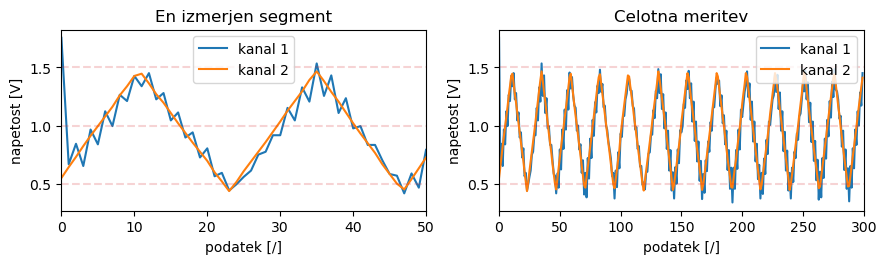

In [4]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(3,3,1)
plt.gca().set_title('En izmerjen segment')
plt.plot(kanal_1, label='kanal 1')
plt.plot(kanal_2, label='kanal 2')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.xlim(0, 50)
plt.hlines(1, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(0.5, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(1.5, 0, 50, linestyles="dashed", color='C3', alpha=0.2)
plt.legend()

Tp = 300
plt.subplot(3,3,2)
plt.gca().set_title('Celotna meritev')
plt.plot(kanal_1, label='kanal 1')
plt.plot(kanal_2, label='kanal 2')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.xlim(0, Tp)
plt.hlines(1, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(0.5, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.hlines(1.5, 0, Tp, linestyles="dashed", color='C3', alpha=0.2)
plt.legend()

plt.show()

## Aproksimacija

Spodaj je prikazana aproksimacija na enem od zajetih segmentov. Aproksimacija je izvedena s pomočjo funkcij *InterpolatedUnivariateSpline* in *UnivariateSpline*. Prva naredi podobno, kot če pri *UnivariateSpline* definiramo faktor *"smooth"* : $s=0$. 

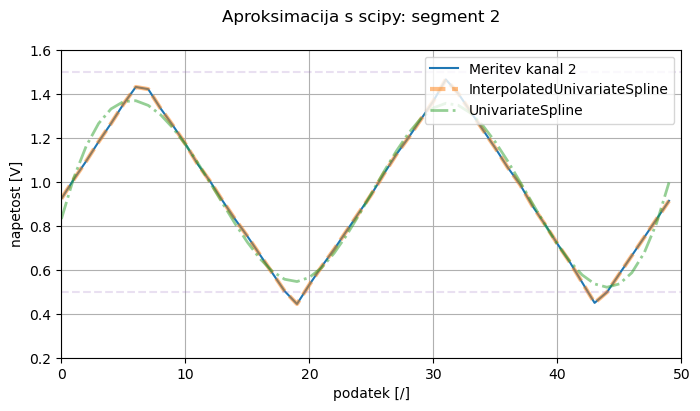

In [5]:
import scipy
i = 2
AA = 50*i 
BB = (i+1)*50         # obseg obravnavanega signala, v morem primeru i-ti segment

# https://jankoslavic.github.io/pynm/notebooks/Predavanje%2008%20-%20Aproksimacija.html#aproksimacija-s-poljubno-funkcijo
spline1 = scipy.interpolate.InterpolatedUnivariateSpline(N[AA:BB], kanal_2[AA:BB]) #dejansko niterpolacija, ne aproksimacija (uporabi vse točke)
spline2 = scipy.interpolate.UnivariateSpline(N[AA:BB], kanal_2[AA:BB], s=0.1) #močan faktor "smooth": s 

fig = plt.figure(figsize=(8, 4))
plt.suptitle(f'Aproksimacija s scipy: segment {i}')
plt.plot(N[AA:BB], kanal_2[AA:BB], label='Meritev kanal 2')
plt.plot(N[AA:BB], spline1(N[AA:BB]), '--', alpha=0.5, lw=3, label='InterpolatedUnivariateSpline')
plt.plot(N[AA:BB], spline2(N[AA:BB]), '-.', alpha=0.5, lw=2, label='UnivariateSpline')
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')
plt.hlines(0.5, 0, 50, linestyles="dashed", color='C4', alpha=0.2)
plt.hlines(1.5, 0, 50, linestyles="dashed", color='C4', alpha=0.2)
plt.xlim(0, 50)
plt.ylim(0.2, 1.6)
plt.legend(loc='upper right')
plt.grid(which='both')
plt.show()

## Numerično integriranje

Za numerično integracijo bom uporabili orodje *scipy.integrate.trapezoid*, kot eno izmed možnosti. Za teoretičen signal bi integral enega segmenta mojega signala moral biti enak *offset* $\cdot$ *dolžina segmenta*. V mojem primeru je to 1 $\cdot$ 0.5 = 0.5.
Dejanski zajet signal je v y-smeri zamaknjen nekoliko manj kot 1, zato je tudi izračunan integral nekoliko manj kot 0,5.

Pojavi se odstopanje na 3 decimalki, a je to ob uporabi trapezoid metode pričakovano.

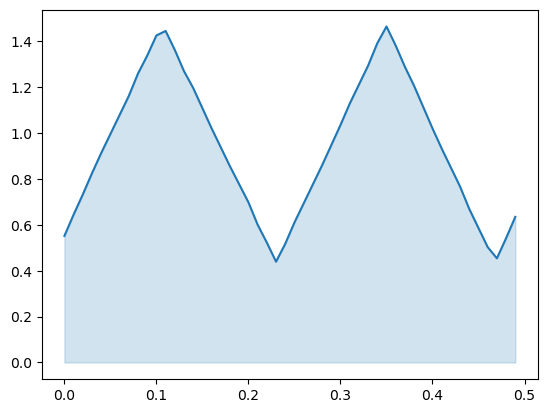

Integracija s scipy: 		 0.4644 
Integracija referenčna: 	 0.4610 


In [6]:
i = 0
AA = 50*i 
BB = (i+1)*50 

I_trapezoid = scipy.integrate.trapezoid(kanal_2[AA:BB], t[AA:BB])
I_ref = np.average(kanal_2[AA:BB]) * 0.49

plt.plot(t[AA:BB], kanal_2[AA:BB])
plt.fill_between(t[AA:BB], 0, kanal_2[AA:BB], color='C0', alpha=0.2)
plt.show()
print(f'Integracija s scipy: \t\t {I_trapezoid:.4f} ')
print(f'Integracija referenčna: \t {I_ref:.4f} ')


## Filtriranje visokofrekvenčnega šuma

Text(0, 0.5, 'napetost [V]')

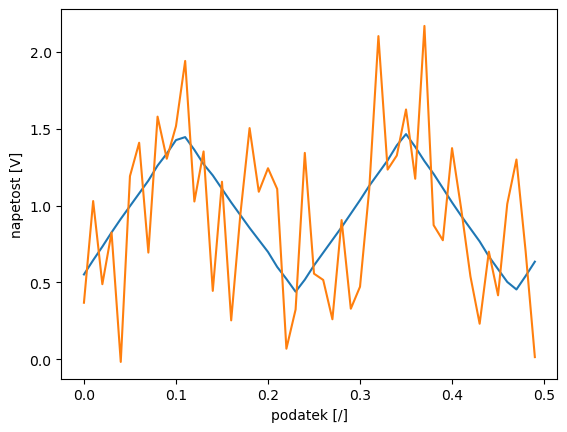

In [62]:
kanal_2 = kanal_2[:50]
k2 = kanal_2 + 0.5 * np.random.normal(0,1,50)
t = t[:50]

plt.plot(t, kanal_2)
plt.plot(t, kanal_2_sum)
plt.xlabel('podatek [/]')
plt.ylabel('napetost [V]')

In [63]:
from scipy import signal, ndimage

In [64]:
trajanje = 0.5
sample_rate = 100


In [14]:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, kanal_2_sum, zi=zi*kanal_2_sum[0])

z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, kanal_2_sum)

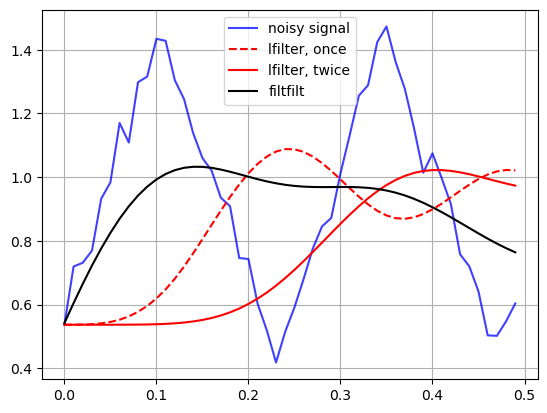

In [16]:
plt.figure
plt.plot(t, kanal_2_sum, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [48]:
from scipy.signal import butter, lfilter, freqz

kanal_2_sum =2* np.sin(10 *t)+ 0.05 * np.random.normal(0,1,50)

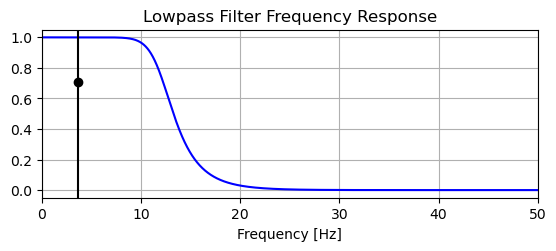

In [49]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

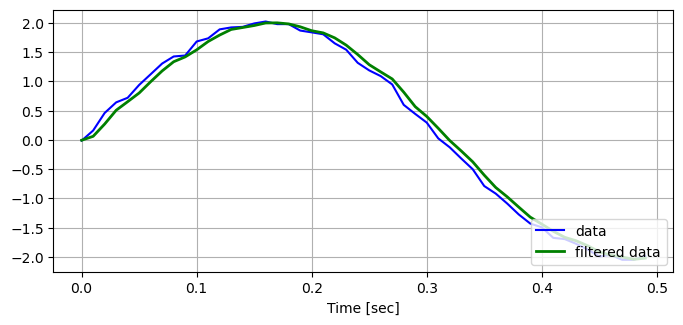

In [57]:
order = 1
fs = 100.0       # sample rate, Hz
cutoff = 20  # desired cutoff frequency of the filter, Hz
data = kanal_2_sum
y = butter_lowpass_filter(data, cutoff, fs, order)

fig = plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend(loc='lower right')

plt.subplots_adjust(hspace=0.35)
plt.show()

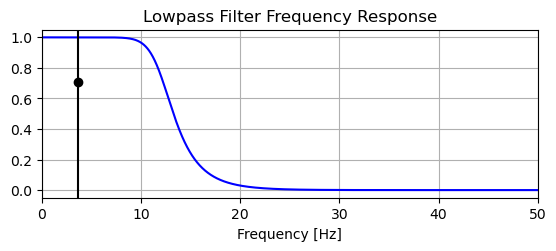

In [51]:
w, h = freqz(b, a, fs=fs, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()